In [3]:
#WHile, this being part of the EDA process, data viz is a key component when it comes to present your data task 
#non-connoisseurs.
#The focus of this will be on pairplot which is basically the process of vizualising variables between each other
#THis prove critical when it comes to unveils pattern, relationship, anomalies, correlation in our data 
#(variables mostly)
#This can be used to inform our subsequent analysis

In [4]:
import pandas as pd
import seaborn as sns


In [16]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
sns.set(style="ticks", color_codes=True)

In [7]:
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12,12)


In [8]:
sns.set(rc={'figure.figsize':(15,15)})

In [9]:
plt.figure(figsize=(20,15))

In [10]:
#The dataset we gonna work with is the gapminder which is basically information about lifeExp, gdpPercap, size of
#population over the years
df = pd.read_csv('./gapminder.tsv' , sep= '\t')

In [11]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [13]:
#we have 1704 entries for 6 variables , with no missing values

In [14]:
#142 countries have been investigated
df['country'].nunique()

142

In [17]:
#This simple line of code allows to see that CHina was the most populated out of the bunch in 2007
df.loc[ df['pop']== np.max(df['pop']),: ]

,country,continent,year,lifeExp,pop,gdpPercap
299,China,Asia,2007,72.961,1318683096,4959.114854


In [18]:
#Sao Tome was the less populated country in 1952 with 60.011 habitants
df.loc[ df['pop']== np.min(df['pop']),: ]

,country,continent,year,lifeExp,pop,gdpPercap
1296,Sao Tome and Principe,Africa,1952,46.471,60011,879.583586


In [19]:
#The pairplot builds on two basic figures: histograms and scatter plots
#---> On the diagonals, we have the distribution of each variables
#---> On the upper and lower triangle, we have the scatter plot of each variable with respect to another

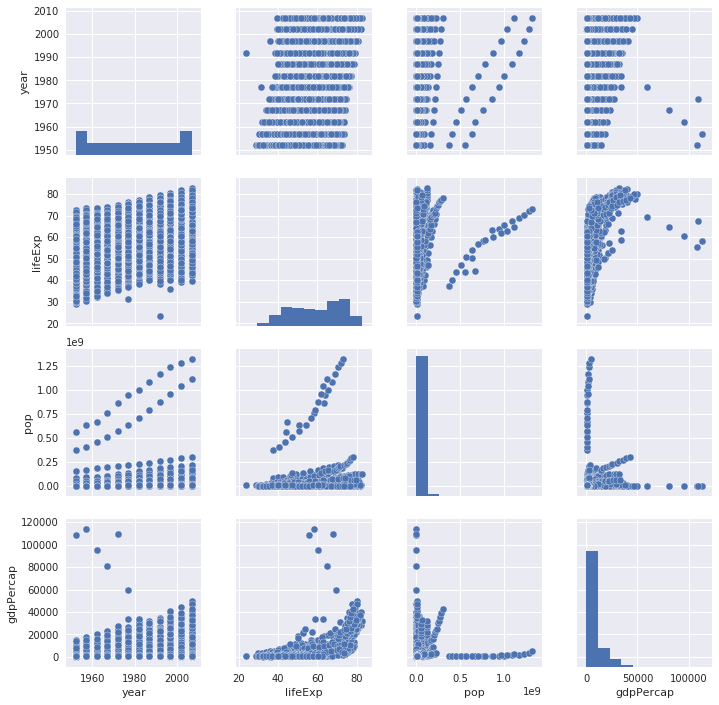

In [20]:
sns.pairplot(df) #size=6

In [21]:
#It's marvelous how just one single line makes these plots 
#This plot also give us valuable insights. For instance, we might see that in the upper triangle 
#In the  gdp vs lifeexp ,  lifeexp steadily increase with the gdpPercap, <==> This may simply 
#means that people in high income countries tend to live longer 
#Also, thankfuklly, we observe that life expectancies generally rise over time regardless of the countries.
#This could be the result of investments in poor countries to make life of their habitants better.

In [22]:
#From the histograms, we learn that the population and gdp variables are heavily right-skewed. 
#To better show these variables in future plots, 
#we can transform these columns by taking the logarithm of the values:

In [23]:
#We take the log of those two variables
df['log_pop'] = np.log10(df['pop'])

df['log_GDP_per_Cap'] = np.log10(df['gdpPercap'])
#We have chosend to take the log of those values to make  
#these variables normally distributed which will give a more thorough representation of the values

In [24]:
df = df.drop(columns=['pop' , 'gdpPercap'])

In [25]:
df.head(3)

,country,continent,year,lifeExp,log_pop,log_GDP_per_Cap
0,Afghanistan,Asia,1952,28.801,6.925587,2.891786
1,Afghanistan,Asia,1957,30.332,6.965716,2.914265
2,Afghanistan,Asia,1962,31.997,7.011447,2.931000


In [26]:
#Ignoring the countries might prove misleading, let's pairplot the variables and have each of the distribution
#of variable coloured. This will unveil more informative with regards to our data

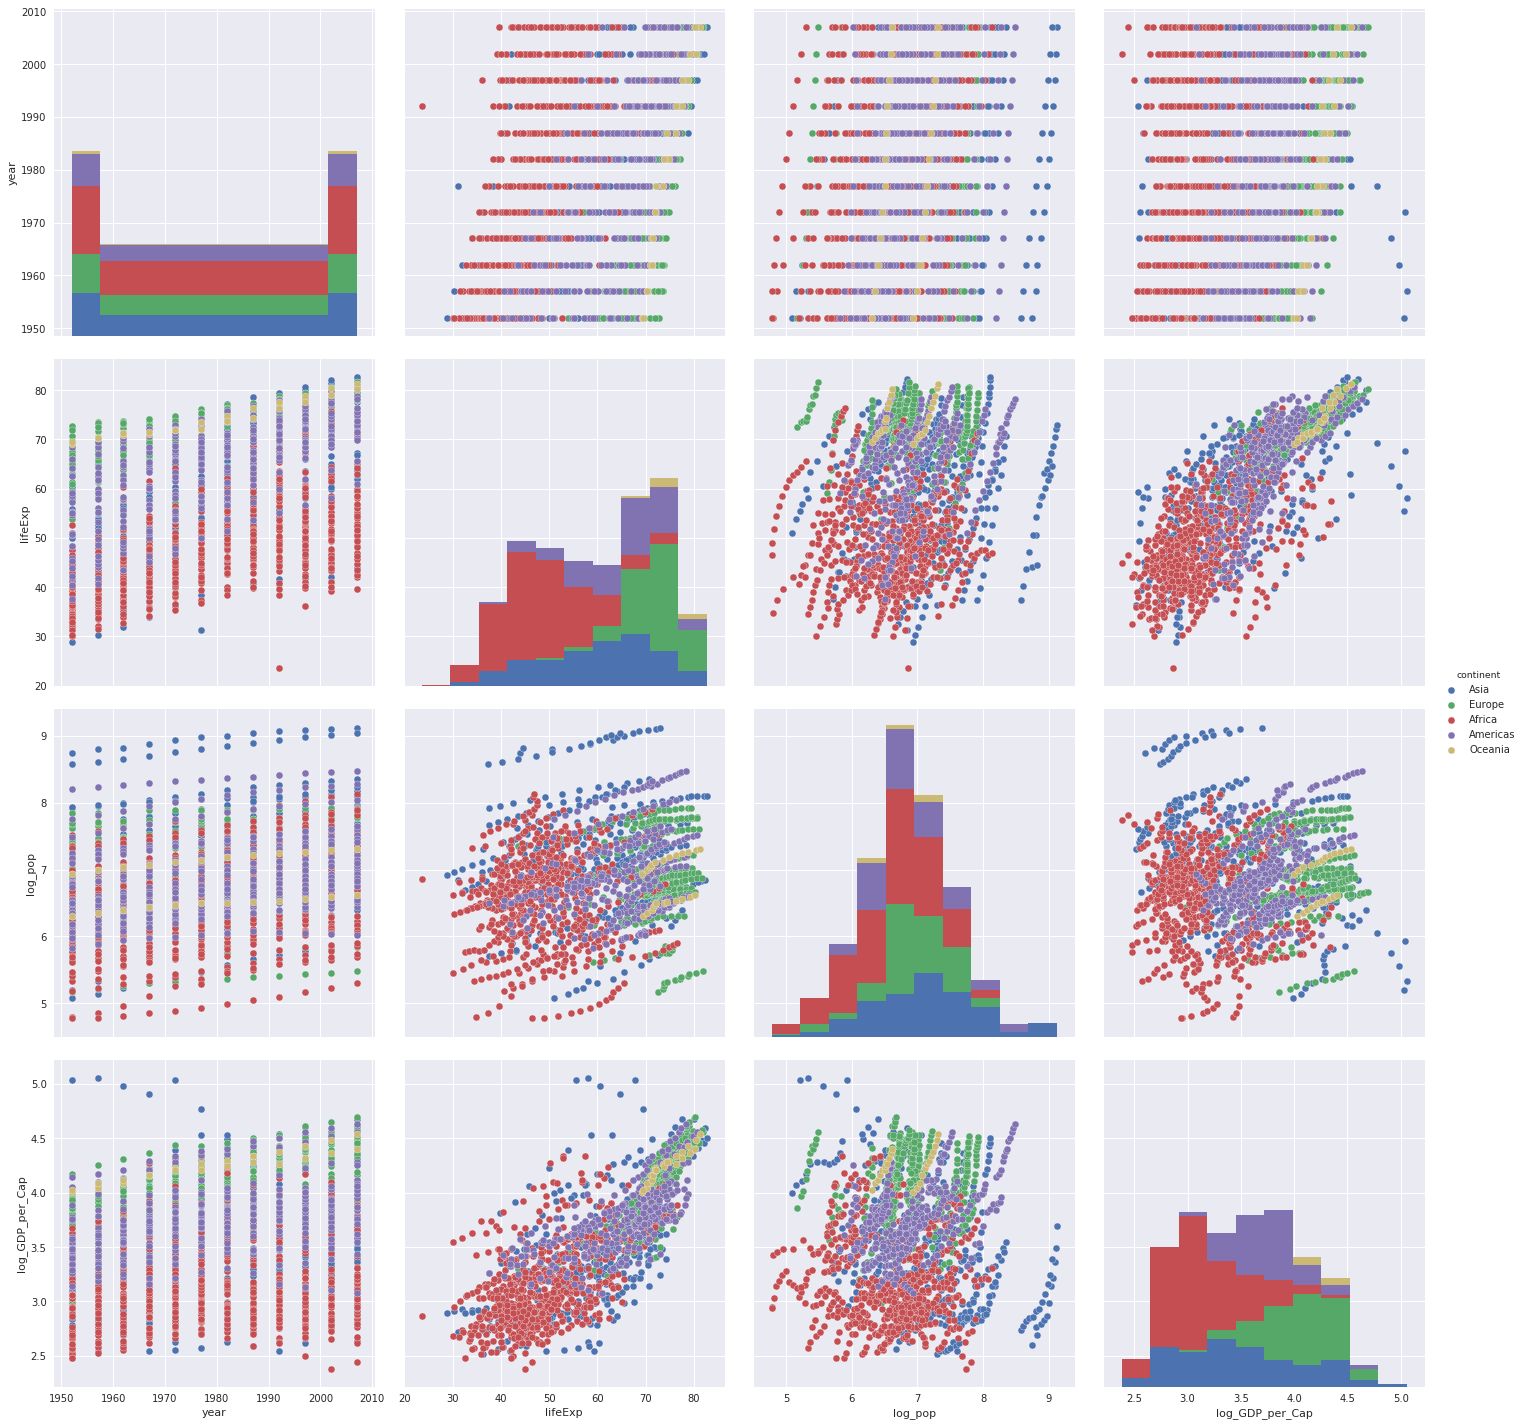

In [27]:
sns.pairplot(df , hue = 'continent', size = 5) #hue allows to differentiate between continents

In [28]:
#This graph is more informative.
#For instance, on (2 *1 ), we might notice that in the 60s, Asia used to be place with the less LifeExp
#The litteraly give the role to Africa  that has really touched the bottom line  at the end of 90s
#Where as sunshinely,Oceznia is the place with a steady and consistent life expectancy.
#On the other end, the idea of having the histograms stacked one across another for each continent
#is not interpretable. A better method for showing univariate (single variable) distributions 
#from multiple categories is the density plot. We can exchange he histogram for a density plot in the function call.

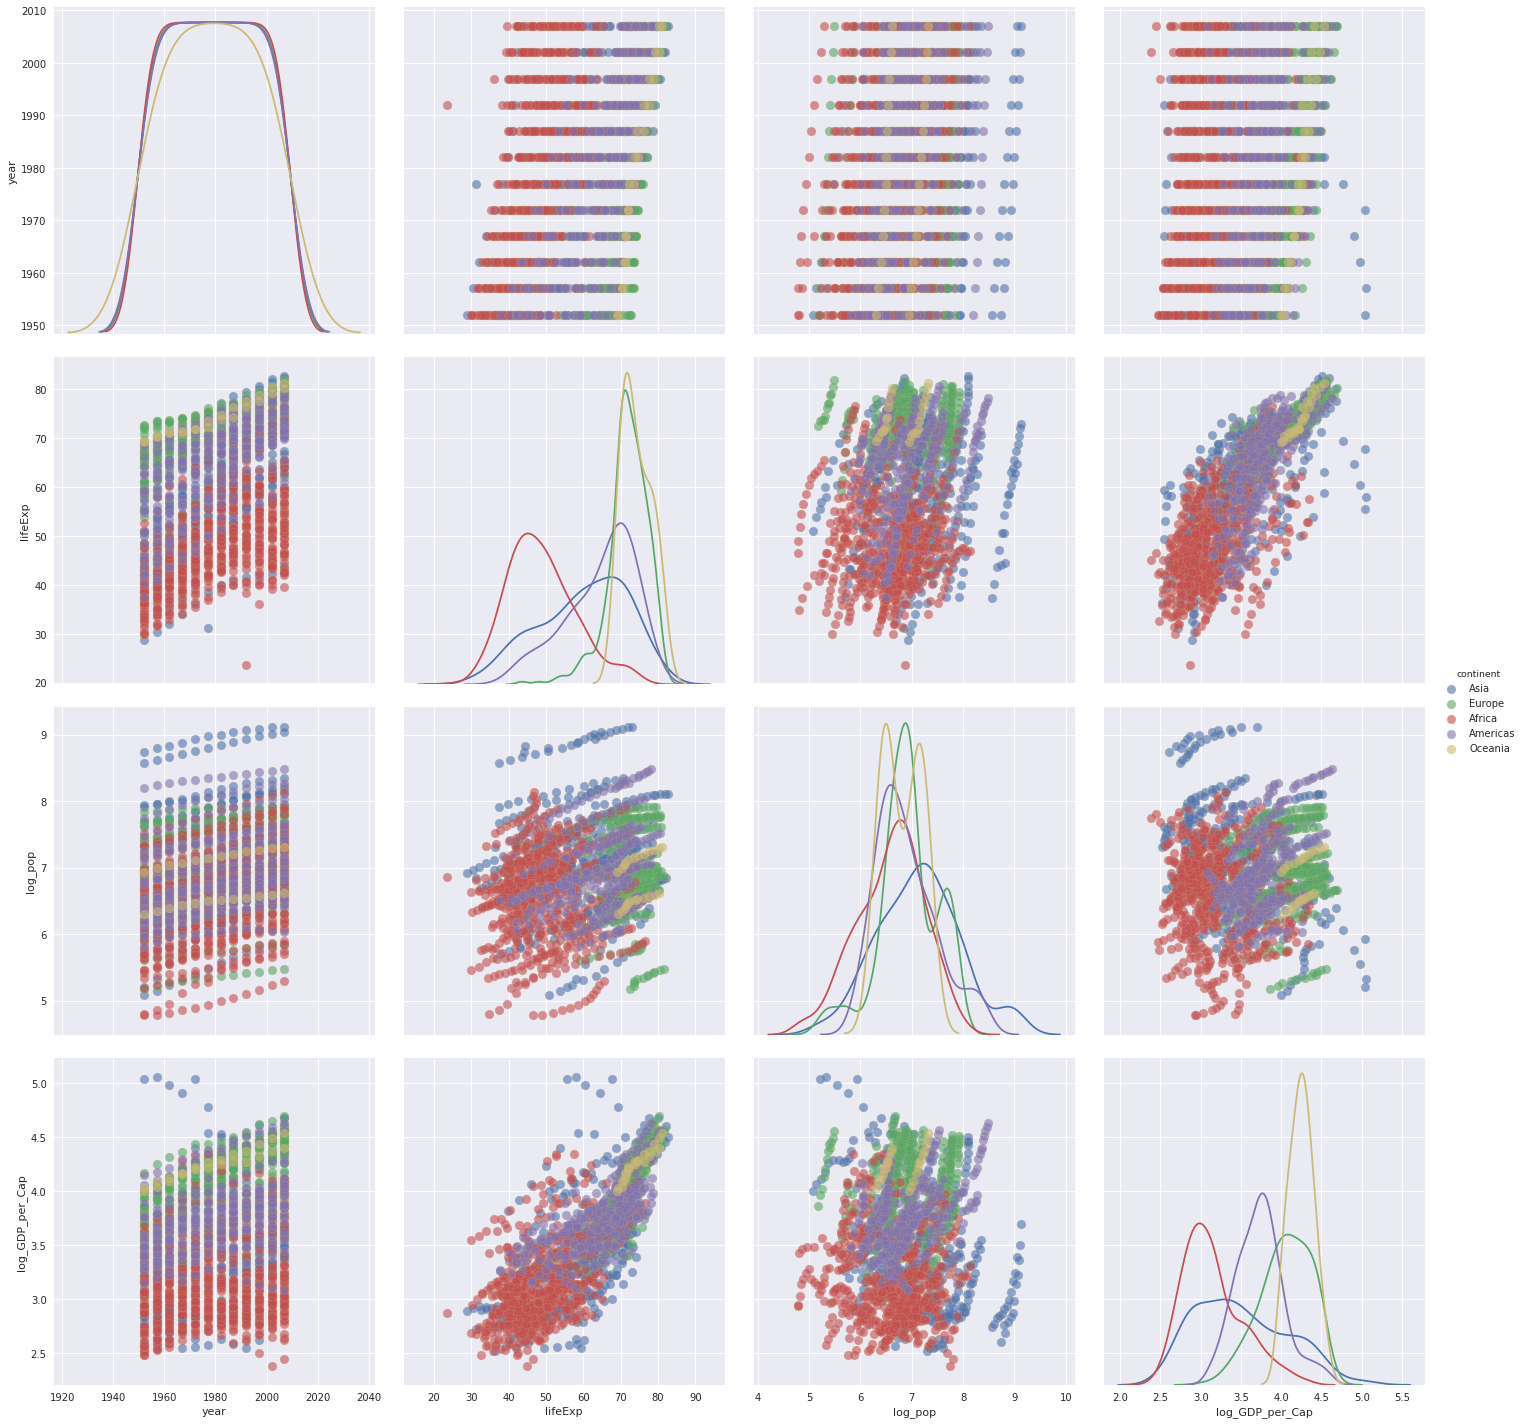

In [29]:
sns.pairplot(df , hue='continent' , diag_kind='kde' , 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'y'},
             size = 5)

In [30]:
#From the above graph, we can clearly see the distribution of each variable without being overshadowed by each other
#The density plots vividly enhance the comparison between each distribution regarding the continent 
#than the stacked bars.
#Another factor playing a key role in the diagonal plots is the transparency between the density plots which 
#considerably augment on readability since there is a lot of overlap

As a final example of the default pairplot, we can consider reducing the clutter by plotting only
the years between 1990 and 2000.  We will still color by continent, but now we won’t plot the year column. 
To limit the columns plotted, we pass in a list of vars to the function. To clarify the plot, we can also add a title

In [ ]:
df.columns

Text(0.5,0.98,'Plot of socioeconomic between 90s and 00s')

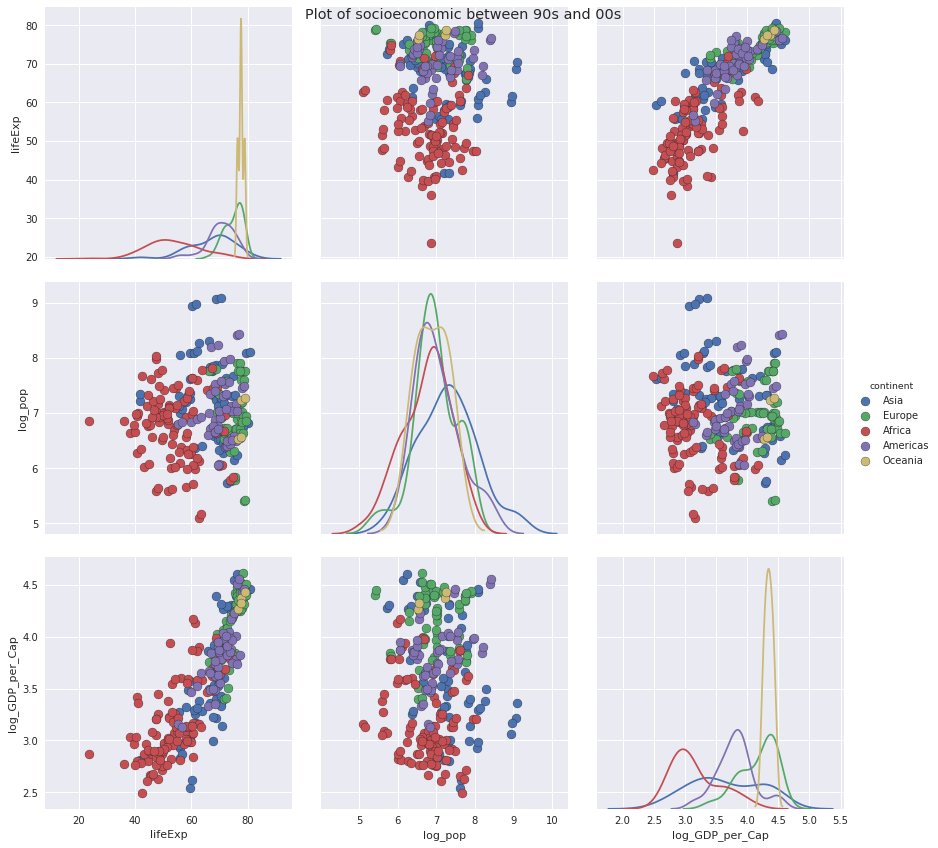

In [31]:
sns.pairplot(df[(df['year'] > 1990) & (df['year'] <2000)] , hue= 'continent',
             vars = ['lifeExp', 'log_pop', 'log_GDP_per_Cap'],
            diag_kind='kde' , plot_kws={'alpha' : 1 , 's': 80, 'edgecolor': 'k' },
            size = 4)

plt.suptitle('Plot of socioeconomic between 90s and 00s')

## Customization with Pairgrid

In contrast to the sns.pairplot function, sns.PairGrid is a class which means that it does not automatically fill in the plots for us. Instead, we create a class instance and then we map specific functions to the different sections of the grid. To create a PairGrid instance with our data, we use the following code which also limits the variables we will show:

/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


ValueError: The number of observations must be larger than the number of variables.

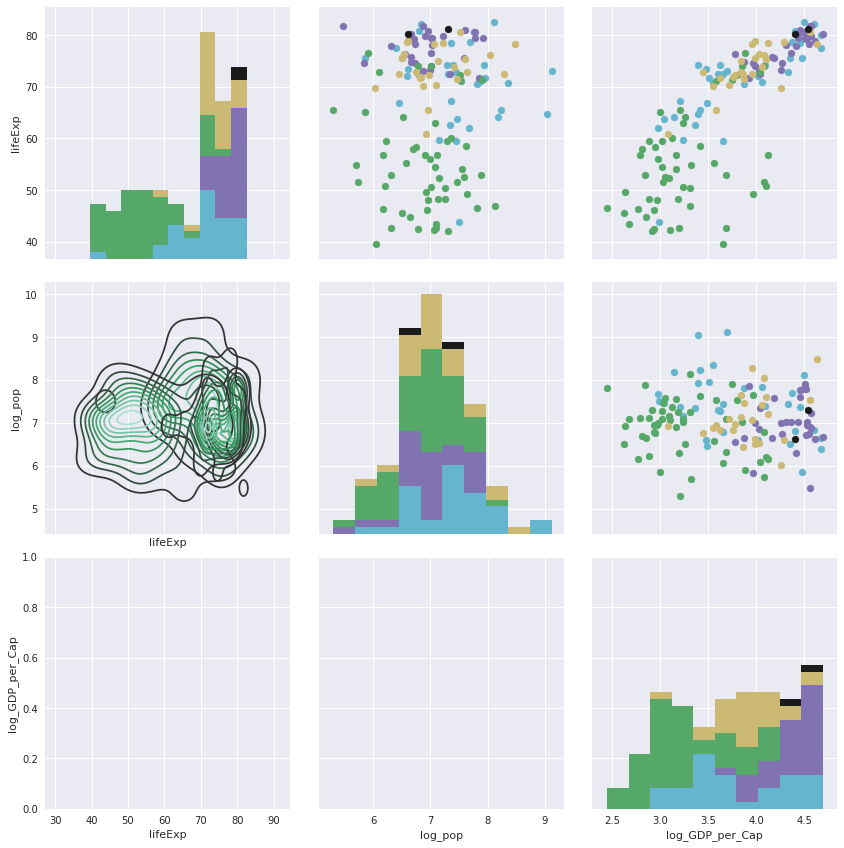

In [80]:
grid = sns.PairGrid(data = df[df['year'] == 2007] , hue= 'continent',
             vars=['lifeExp', 'log_pop','log_GDP_per_Cap'], palette = ['c','m','g', 'y' , 'k'], size=4
            )
grid.map_upper(plt.scatter)
grid.map_diag(plt.hist) #color = 'darkturquoise')
grid = grid.map_lower(sns.kdeplot)#,cmap = 'Reds')

##grid.map_lower(plt.scatter, color = 'fuchsia')


In [73]:
sns.PairGrid?

In [78]:
from matplotlib import cm

In [ ]:
cm.

In [81]:
def descr(x, **kwargs):
    
    #describe the statistics
    s1 = x.mean()
    s2 = x.std()
    lb1 = 'mean = ' + str(round(s1, 2))
    lb2 = 'std= ' + str(round(s2 , 2))
    
    ax = plt.gca()
    ax.annotate([lb1 , lb2], xy = (0.2,0.2), xycoords = ax.transAxes)

/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


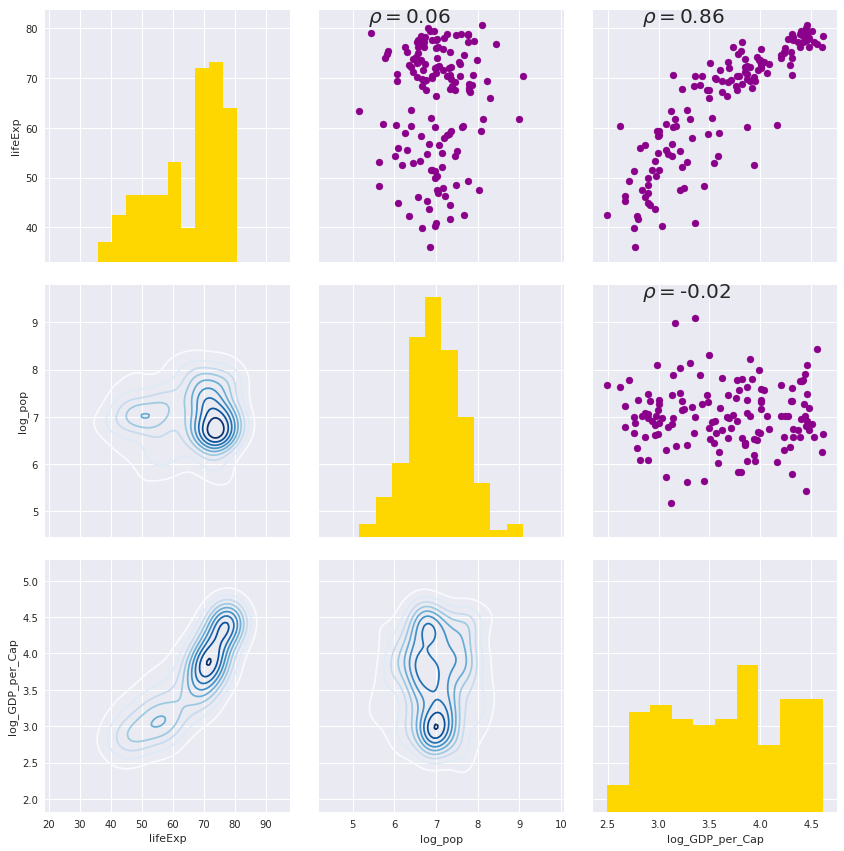

In [82]:
def corr( x , y, **kwargs):
    
    #calculate the value
    coef = np.corrcoef(x , y)[0][1]
    
    #make the label
    label = r'$\rho = $' + str(round(coef , 2))
    
    #add the label to the graph
    ax = plt.gca() #get the current axis
    
    ax.annotate(label, xy = (0.2 , 0.95) , size = 20 , xycoords = ax.transAxes)
    

#Create a pair grid instance

sketch = sns.PairGrid(data = df[df['year'] == 1997] , 
                     vars = ['lifeExp', 'log_pop','log_GDP_per_Cap'] , 
                     size = 4 ) 

sketch.map_upper (plt.scatter , color = 'darkmagenta')
sketch.map_upper(corr)
sketch.map_lower(sns.kdeplot , cmap = cm.Blues )
sketch.map_diag(plt.hist , color = 'gold')
#sketch.map_diag(descr)
#sketch.map_diag(stat)


We get a blank graph because we have not mapped any functions to the grid sections. There are three grid sections to fill in for a PairGrid: the upper triangle, lower triangle, and the diagonal. To map plots to these sections, we use the grid.map method on the section. For example, to map a scatter plot to the upper triangle we use:

Pairs plots are a powerful tool to quickly explore distributions and relationships in a dataset. Seaborn provides a simple default method for making pair plots that can be customized and extended through the Pair Grid class. In a data analysis project, a major portion of the value often comes not in the flashy machine learning, but in the straightforward visualization of data. A pairs plot is provides us with a comprehensive first look at our data and is a great starting point in data analysis projects.